In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/ML/Heart Rate/heart.csv')
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Check Data Size and Shape


In [ ]:
print("Data shape:",dataset.shape)

Data shape: (303, 14)


To Check Missing Values


In [ ]:
dataset.isnull().sum()
print(dataset.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


To convert datasets in x,y variable


In [ ]:
X = dataset.iloc[:, 0:13].values
x = dataset.iloc[:, 0:13]
y = dataset.iloc[:, 13].values
y_name = dataset.iloc[:, 13:14]
print("X shape:",X.shape)
print("y shape:",y_name.shape)

X shape: (303, 13)
y shape: (303, 1)


In [ ]:
# iterating the columns 
print("Attributes:\n")
for col in x.columns: 
    print(col)

print("\n")
print("Class:")
for col in y_name.columns: 
    print(col)


Attributes:

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


Class:
target


Co-relation Matrix (To know identify the relationship of target with attributes


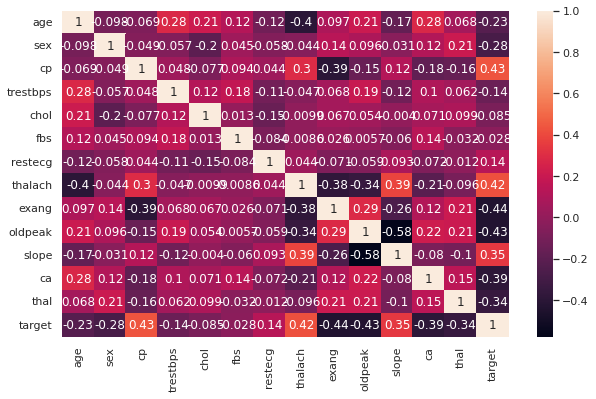

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(font_scale=1)
sn.set_style("darkgrid")
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(dataset.corr(),annot=True, ax=ax)
plt.show()

Splitting (Train/Test) (80% Train, 20% Test)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


Feature Scaling (Difference between Each Attributes)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Model Train

KNN

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

Train the Model

In [ ]:
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predicting the Test set results
y_pred_knn = classifier_knn.predict(X_test)

In [ ]:
print(y_pred_knn)

[0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0
 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[21  6]
 [ 5 29]]


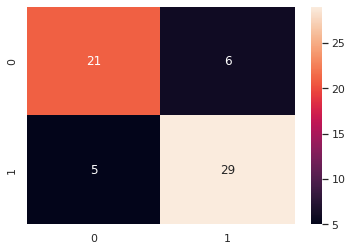

In [ ]:
sn.heatmap(cm_knn, annot= True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_knn)
pre = precision_score(y_test, y_pred_knn)
re  = recall_score(y_test, y_pred_knn)
f1  = f1_score(y_test, y_pred_knn)


In [ ]:
print("Summary of KNN")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of KNN
Accuracy    = 0.819672131147541
Precison    = 0.8285714285714286
Recall      = 0.8529411764705882
f1 score    = 0.8405797101449276


ROC Curve

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [ ]:
prob_all_knn = classifier_knn.predict_proba(X_test)
print(prob_all_knn)


[[1.  0. ]
 [0.6 0.4]
 [0.6 0.4]
 [1.  0. ]
 [0.6 0.4]
 [0.2 0.8]
 [0.8 0.2]
 [0.6 0.4]
 [1.  0. ]
 [1.  0. ]
 [0.2 0.8]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.2 0.8]
 [0.8 0.2]
 [0.  1. ]
 [0.8 0.2]
 [0.2 0.8]
 [0.2 0.8]
 [0.4 0.6]
 [0.8 0.2]
 [1.  0. ]
 [0.2 0.8]
 [0.2 0.8]
 [0.8 0.2]
 [0.6 0.4]
 [0.  1. ]
 [0.  1. ]
 [0.8 0.2]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.6 0.4]
 [1.  0. ]
 [0.2 0.8]
 [0.8 0.2]
 [0.4 0.6]
 [0.  1. ]
 [0.2 0.8]
 [0.2 0.8]
 [0.8 0.2]
 [0.2 0.8]
 [0.6 0.4]
 [0.2 0.8]
 [0.4 0.6]
 [0.8 0.2]
 [0.  1. ]
 [0.  1. ]
 [0.6 0.4]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.8 0.2]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]]


In [ ]:
# keep probabilities for the positive outcome only
probs_knn = prob_all_knn[:, 1]

In [ ]:
# calculate scores
auc_knn = roc_auc_score(y_test, probs_knn)
print('K-NN: ROC AUC=%.3f' % (auc_knn))

K-NN: ROC AUC=0.917


In [ ]:
# Plot the ROC 

# calculate roc curves
fpr_knn, tpr_knn, _ = roc_curve(y_test, probs_knn)

In [ ]:
print(fpr_knn)

[0.         0.03703704 0.11111111 0.22222222 0.37037037 0.7037037
 1.        ]


In [ ]:
print(tpr_knn)

[0.         0.55882353 0.85294118 0.85294118 0.97058824 1.
 1.        ]


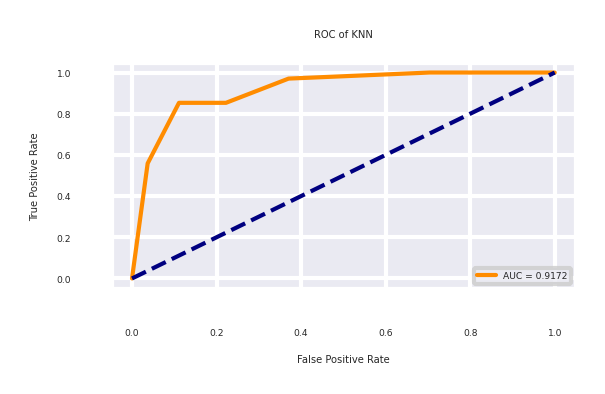

In [ ]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_knn, tpr_knn,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of KNN")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


SVM


In [ ]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf',probability=True, random_state = 0)

In [ ]:
# Training the SVM
classifier_svm.fit(X_train, y_train)

SVC(probability=True, random_state=0)

In [ ]:
# Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[21  6]
 [ 2 32]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_svm)
pre = precision_score(y_test, y_pred_svm)
re  = recall_score(y_test, y_pred_svm)
f1  = f1_score(y_test, y_pred_svm)

In [ ]:
print("Summary of SVM")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of SVM
Accuracy    = 0.8688524590163934
Precison    = 0.8421052631578947
Recall      = 0.9411764705882353
f1 score    = 0.8888888888888888


# ROC of SVM


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
prob_all_svm = classifier_svm.predict_proba(X_test)

In [ ]:
# keep probabilities for the positive outcome only
probs_svm = prob_all_svm[:, 1]


In [ ]:
# calculate scores
auc_svm = roc_auc_score(y_test, probs_svm)
print('SVM: ROC AUC=%.3f' % (auc_svm))

SVM: ROC AUC=0.929


In [ ]:
# Plot the ROC 

# calculate roc curves
fpr_svm, tpr_svm, _ = roc_curve(y_test, probs_svm)


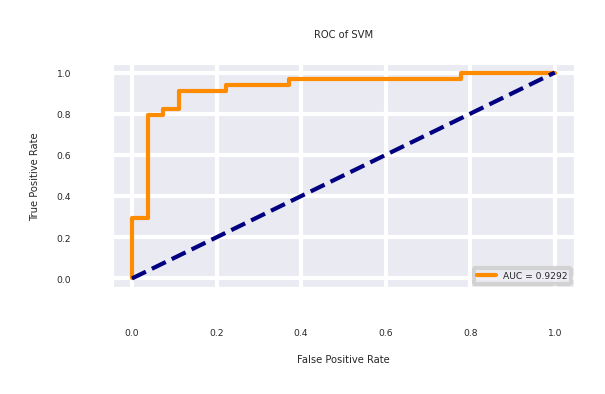

In [ ]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_svm, tpr_svm,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_svm)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

ROC Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [ ]:
# Training the Decision Tree
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[22  5]
 [ 8 26]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_dt)
pre = precision_score(y_test, y_pred_dt)
re  = recall_score(y_test, y_pred_dt)
f1  = f1_score(y_test, y_pred_dt)


In [ ]:
print("Summary of Decision Tree")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of Decision Tree
Accuracy    = 0.7868852459016393
Precison    = 0.8387096774193549
Recall      = 0.7647058823529411
f1 score    = 0.7999999999999999


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [ ]:
prob_all_dt = classifier_dt.predict_proba(X_test)


In [ ]:
# keep probabilities for the positive outcome only
probs_dt = prob_all_dt[:, 1]


In [ ]:
# calculate scores
auc_dt = roc_auc_score(y_test, probs_dt)
print('Decision Tree: ROC AUC=%.3f' % (auc_dt))


Decision Tree: ROC AUC=0.790


In [ ]:
# calculate roc curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, probs_dt)


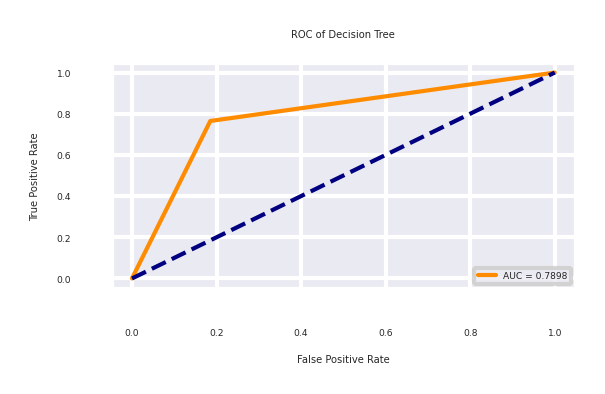

In [ ]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_dt, tpr_dt,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_dt)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_lr= LogisticRegression(dual=False,penalty="l2",random_state=0)

In [ ]:
#Training the decision tree
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#Predicting the test set results
y_pred_lr=classifier_lr.predict(X_test)

In [ ]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[21  6]
 [ 3 31]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_lr)
pre = precision_score(y_test, y_pred_lr)
re  = recall_score(y_test, y_pred_lr)
f1  = f1_score(y_test, y_pred_lr)

In [ ]:
print("Summary of Logistic regression")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of Logistic regression
Accuracy    = 0.8524590163934426
Precison    = 0.8378378378378378
Recall      = 0.9117647058823529
f1 score    = 0.8732394366197184


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
prob_all_lr = classifier_lr.predict_proba(X_test)


In [ ]:
# keep probabilities for the positive outcome only
probs_lr = prob_all_lr[:, 1]

In [ ]:
# calculate scores
auc_lr = roc_auc_score(y_test, probs_lr)
print('Decision Tree: ROC AUC=%.3f' % (auc_lr))


Decision Tree: ROC AUC=0.911


In [ ]:
# calculate roc curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_lr)

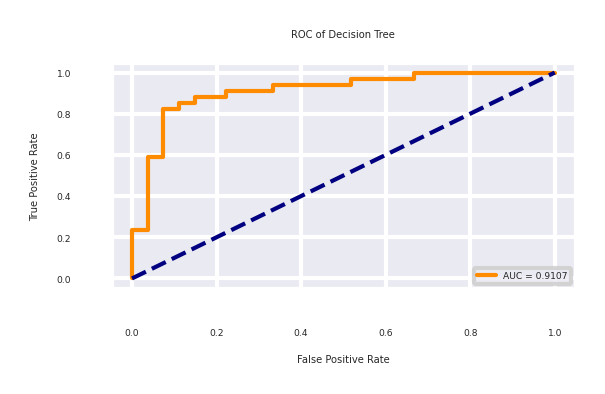

In [ ]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_lr, tpr_lr,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_GaussianNB = GaussianNB(priors=None)

In [ ]:
#Training the decision tree
classifier_GaussianNB.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Predicting the test set results
y_pred_GaussianNB=classifier_GaussianNB.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_GaussianNB = confusion_matrix(y_test, y_pred_GaussianNB)
print(cm_GaussianNB)

[[21  6]
 [ 3 31]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_GaussianNB)
pre = precision_score(y_test, y_pred_GaussianNB)
re  = recall_score(y_test, y_pred_GaussianNB)
f1  = f1_score(y_test, y_pred_GaussianNB)

In [ ]:
print("Summary of GaussianNB ")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of GaussianNB 
Accuracy    = 0.8524590163934426
Precison    = 0.8378378378378378
Recall      = 0.9117647058823529
f1 score    = 0.8732394366197184


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
prob_all_GaussianNB = classifier_GaussianNB.predict_proba(X_test)

In [ ]:
# keep probabilities for the positive outcome only
probs_GaussianNB = prob_all_GaussianNB[:, 1]

In [ ]:
# calculate scores
auc_GaussianNB = roc_auc_score(y_test, probs_GaussianNB)
print('Decision Tree: ROC AUC=%.3f' % (auc_GaussianNB))

Decision Tree: ROC AUC=0.907


In [ ]:
# calculate roc curves
fpr_GaussianNB, tpr_GaussianNB, _ = roc_curve(y_test, probs_GaussianNB)

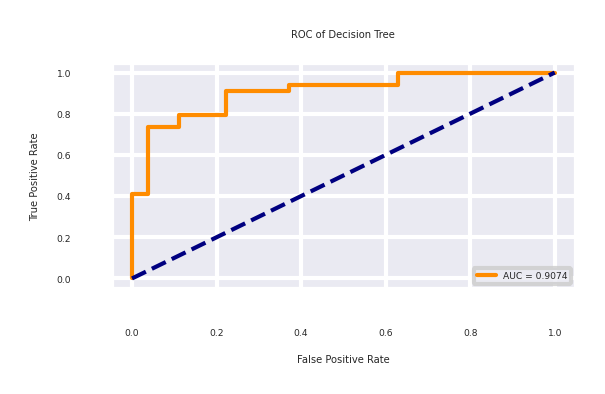

In [ ]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_GaussianNB, tpr_GaussianNB,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_GaussianNB)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion="gini",min_samples_leaf=1,random_state=0)

In [ ]:
#Training the decision tree
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
#Predicting the test set results
y_pred_rf=classifier_rf.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[24  3]
 [ 5 29]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_rf)
pre = precision_score(y_test, y_pred_rf)
re  = recall_score(y_test, y_pred_rf)
f1  = f1_score(y_test, y_pred_rf)

In [ ]:
print("Summary of Random Forest ")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of Random Forest 
Accuracy    = 0.8688524590163934
Precison    = 0.90625
Recall      = 0.8529411764705882
f1 score    = 0.8787878787878787


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
prob_all_rf = classifier_rf.predict_proba(X_test)

In [ ]:
# keep probabilities for the positive outcome only
probs_rf = prob_all_rf[:, 1]

In [ ]:
# calculate scores
auc_rf = roc_auc_score(y_test, probs_rf)
print('Decision Tree: ROC AUC=%.3f' % (auc_rf))

Decision Tree: ROC AUC=0.937


In [ ]:
# calculate roc curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_rf)

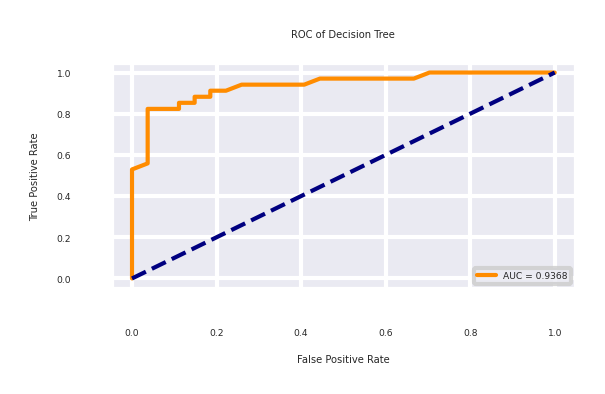

In [ ]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_rf, tpr_rf,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_rf)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()